## USA Real Estate Dataset

Dataset Source: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [3]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import autosklearn
from autosklearn.regression import AutoSklearnRegressor as auto_sklearn_reg

#### Show Library Versions

In [4]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '-------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | -------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 0.24.2
        Imblearn : 0.8.1
         Seaborn : 0.12.2


#### Mount Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ingest Dataset

In [7]:
col_names = ["status",
             "bed",
             "bath",
             "acreage",
             "city",
             "state",
             "zip_code",
             "house_size",
             "was_prev_sold",
             "price"
             ]

dtypes = {"status": str,
          "bed": np.float32,
          "bath": np.float32,
          "acreage": np.float32,
          "city": str,
          "state": str,
          "zip_code": np.float32,
          "house_size": np.float32,
          "was_prev_sold": str,
          "price": np.float32
          }

data = pd.read_csv("/content/drive/MyDrive/projects/USA Real Estate Dataset/realtor-data.csv",
                   names=col_names,
                   dtype=dtypes,
                   engine='c',
                   header=0)

data['prev_sold'] = np.where(data['was_prev_sold'].notnull(), 1, 0)

data = data.drop(columns=['was_prev_sold'])

data.head()

,status,bed,bath,acreage,city,state,zip_code,house_size,price,prev_sold
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0,0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0,0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0,0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0,0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0,0


#### More Dataset Information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407890 entries, 0 to 407889
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   status      407890 non-null  object 
 1   bed         320108 non-null  float32
 2   bath        321618 non-null  float32
 3   acreage     331873 non-null  float32
 4   city        407838 non-null  object 
 5   state       407890 non-null  object 
 6   zip_code    407693 non-null  float32
 7   house_size  324365 non-null  float32
 8   price       407890 non-null  float32
 9   prev_sold   407890 non-null  int64  
dtypes: float32(6), int64(1), object(3)
memory usage: 21.8+ MB


### Visualizations

#### Create Function to Visualize Features (Barplot)

In [9]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   rotation: int = 0,
                   annotation: int = 1
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    - rotation: The degree in the angle of x-axis labels
    - annotation: Whether or not to display the number
        of instances of each category.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(rotation) != 'int', \
        "The y label value must be an integer value."
    assert type(annotation) != 'int', \
        "The y label value must be an integer value."

    ax = feature_to_visualize.value_counts().plot.bar(
                                                      figsize=(12,8),
                                                      rot=rotation,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    if annotation:
        ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Housing Sale Status

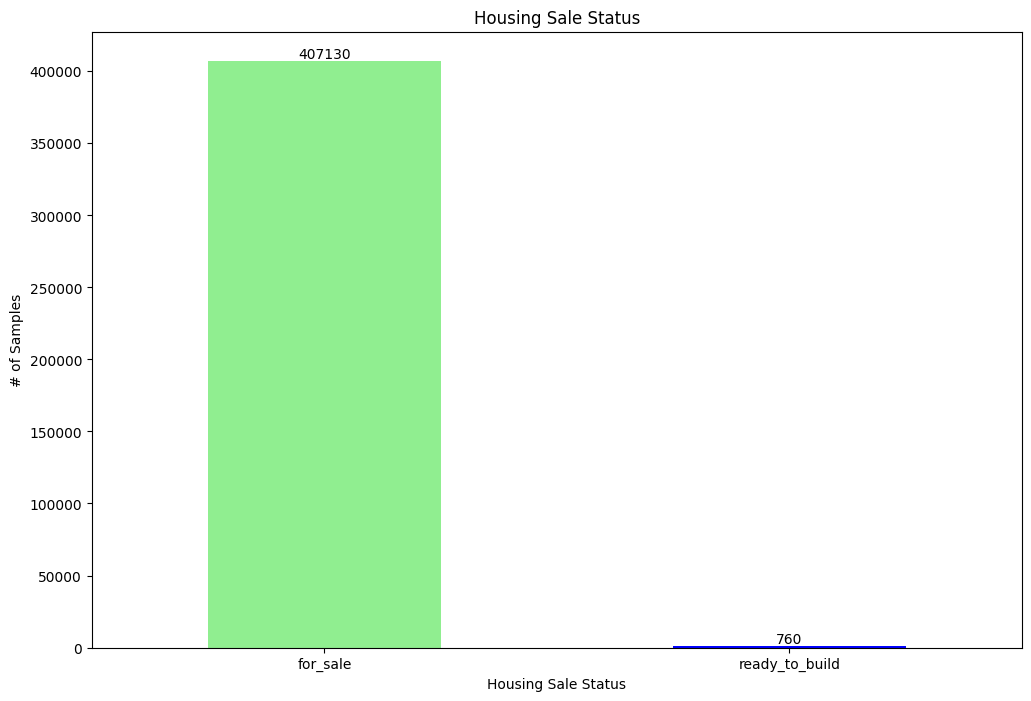

In [10]:
barplot_visual(data["status"],
               "Housing Sale Status",
               "Housing Sale Status",
               "# of Samples",
               )

#### Dataset Visualization: Number of Bedrooms

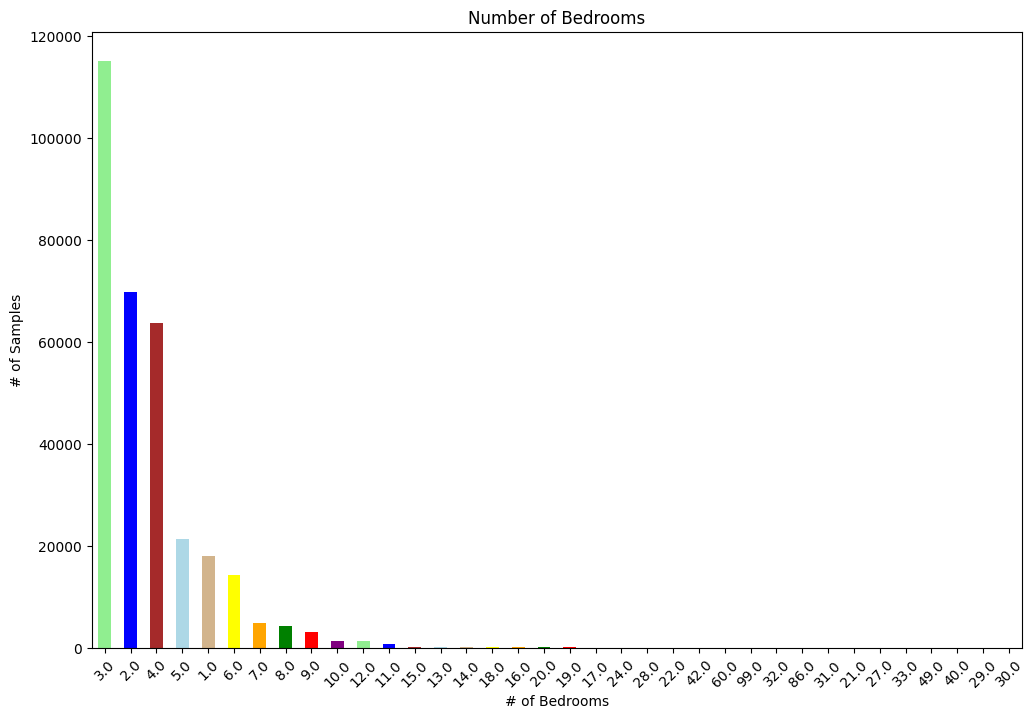

In [11]:
barplot_visual(data["bed"],
               "Number of Bedrooms",
               "# of Bedrooms",
               "# of Samples",
               rotation=45,
               annotation=0
               )

#### Dataset Visualization: Number of Bathrooms

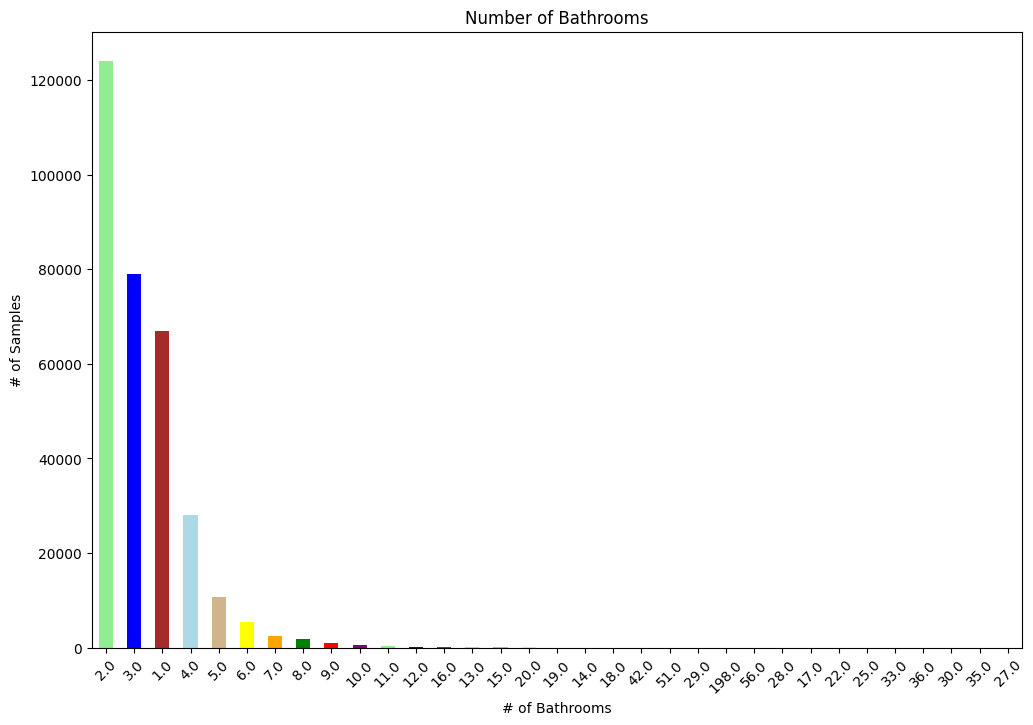

In [12]:
barplot_visual(data["bath"],
               "Number of Bathrooms",
               "# of Bathrooms",
               "# of Samples",
               rotation=45,
               annotation=0
               )

#### Dataset Visualization: Number of Properties in Each State

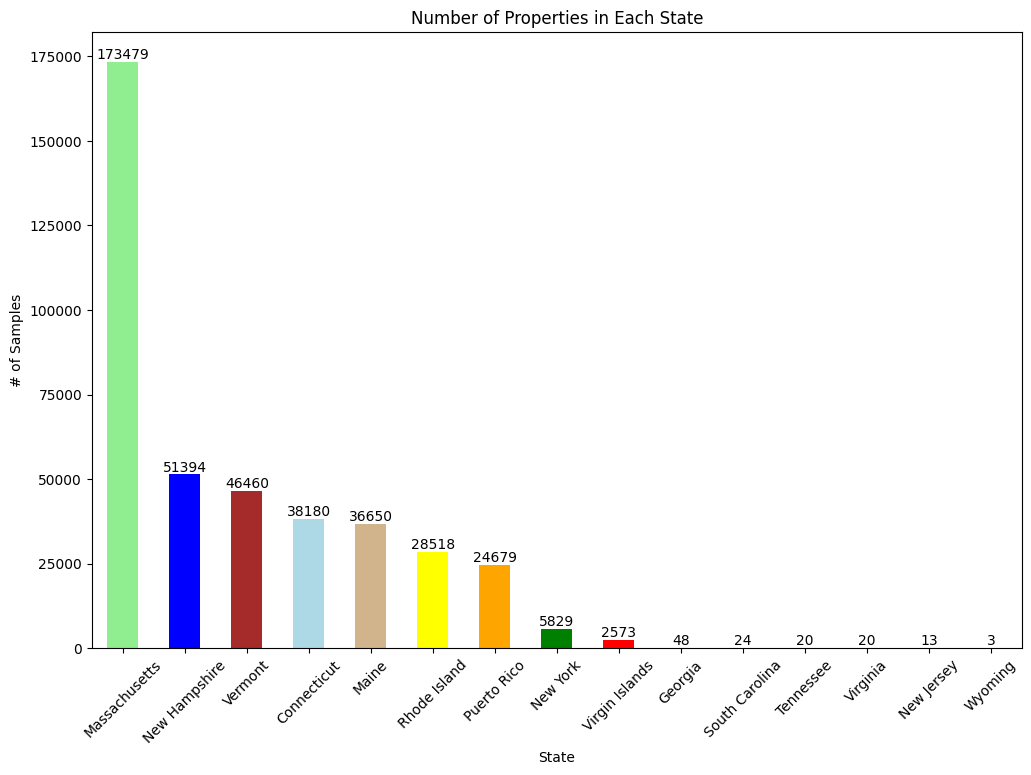

In [13]:
barplot_visual(data["state"],
               "Number of Properties in Each State",
               "State",
               "# of Samples",
               rotation=45
               )

#### Dataset Visualization: Was Property Previously Sold or Not?

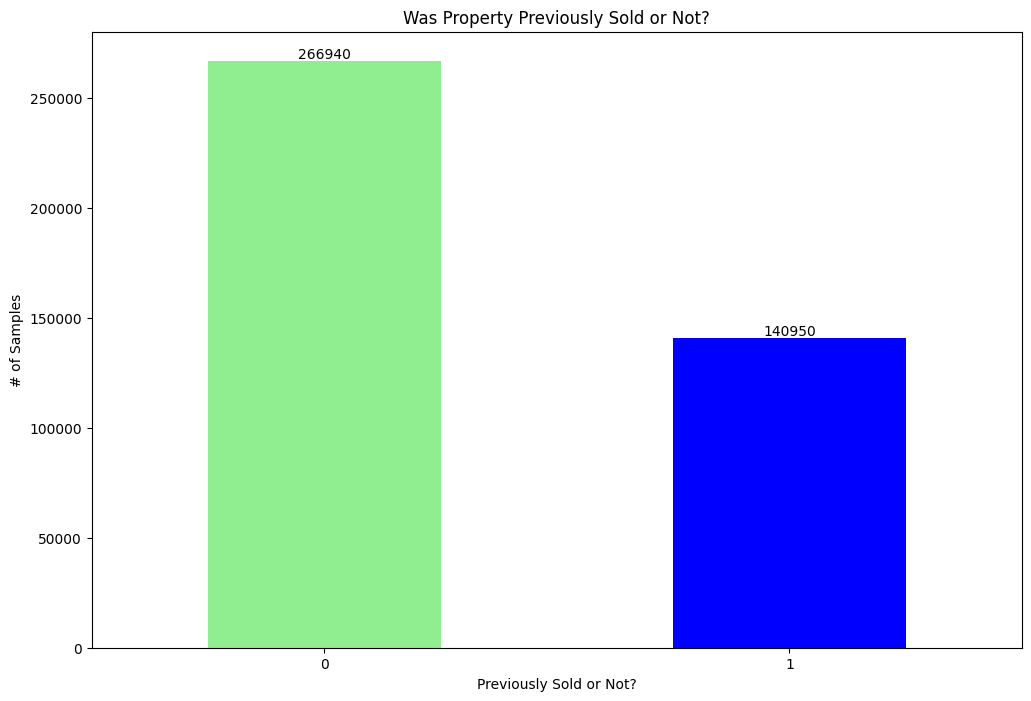

In [14]:
barplot_visual(data["prev_sold"],
               "Was Property Previously Sold or Not?",
               "Previously Sold or Not?",
               "# of Samples",
               )

#### Create Function to Visualize Features (Histograms)

In [15]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: House Size

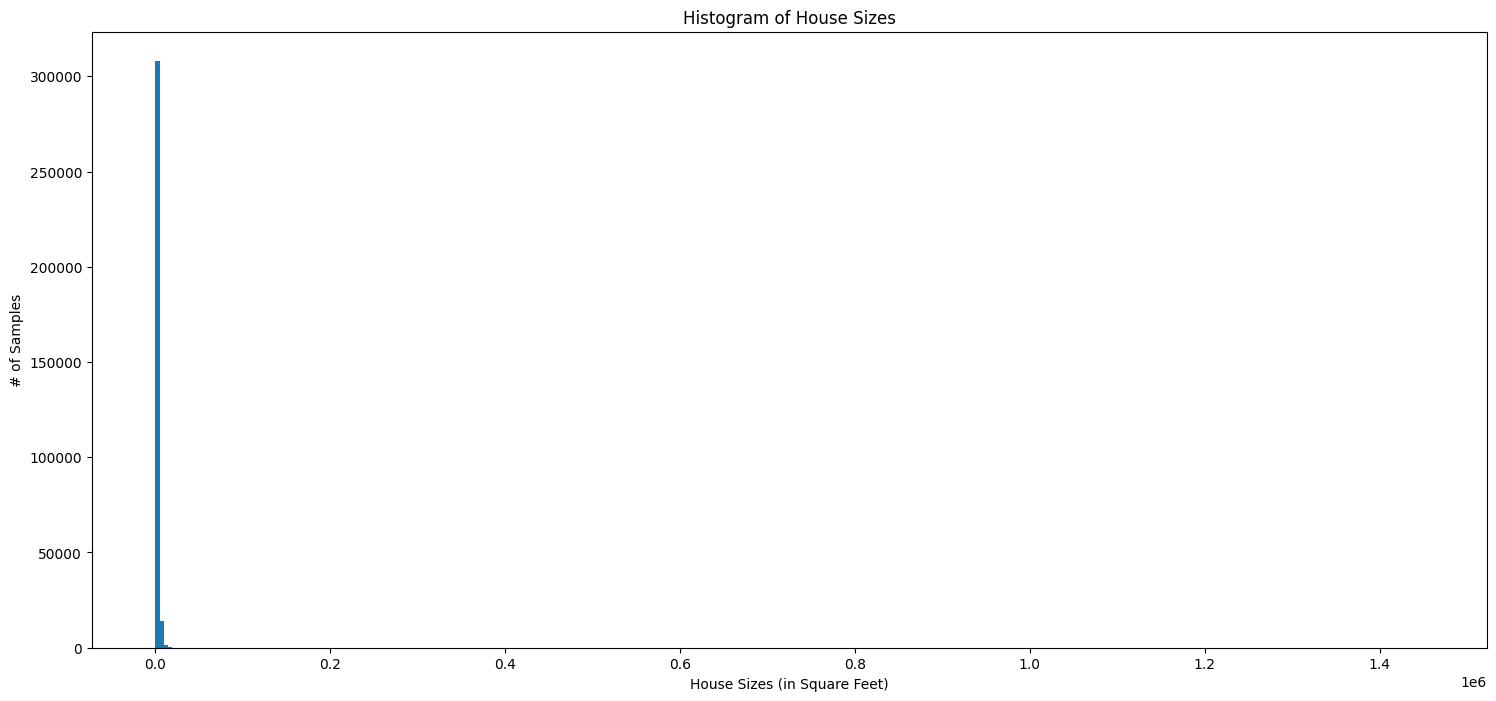

The house sizes range from 100.0 to 1450112.0 sqaure feet.


In [16]:
histogram_visual(data['house_size'],
                 num_of_bins=298,
                 plot_title="Histogram of House Sizes",
                 x_label="House Sizes (in Square Feet)")

print(f"The house sizes range from " +
      f"{min(data['house_size'])} to" +
      f" {max(data['house_size'])} sqaure feet.")

#### Dataset Visualization: House Price

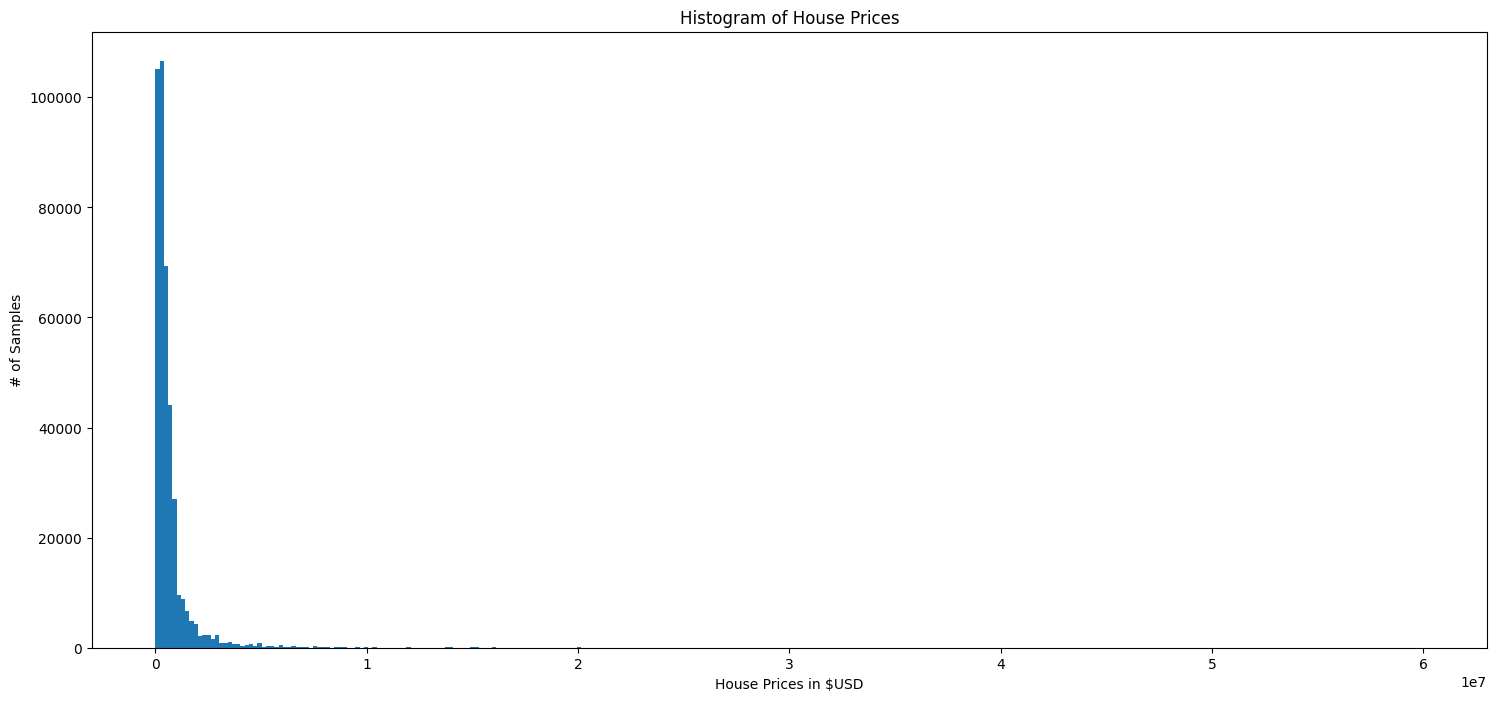

House prices range from $1.0 to $60000000.0.


In [17]:
histogram_visual(data['price'],
                 num_of_bins=298,
                 plot_title="Histogram of House Prices",
                 x_label="House Prices in $USD")

print(f"House prices range from " +
      f"${min(data['price'])} to" +
      f" ${max(data['price'])}.")

#### Correlation Matrix

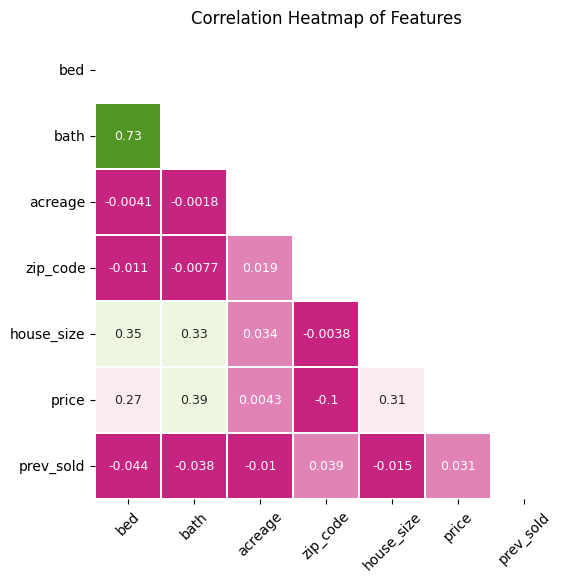

In [18]:
plt.figure(figsize=(6, 6))

numerical_values = ['float32', 'int64']

corr_features = data.select_dtypes(include=numerical_values)

lower_triangle = np.triu(corr_features.corr())

corr_matrix = sns.heatmap(corr_features.corr(),
                          annot=True,
                          cmap=sns.color_palette("PiYG", 8),
                          mask=lower_triangle,
                          square=True,
                          linewidths=0.25,
                          cbar=False,
                          annot_kws={"size":9})

corr_matrix.set_title("Correlation Heatmap of Features",
                      pad=10)

corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(),
                            rotation=45)
plt.show()

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [19]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,status,bed,bath,acreage,city,state,zip_code,house_size,price,prev_sold
count,407890,320108.000000,321618.000000,331873.000000,407838,407890,407693.000000,3.243650e+05,407890.00,407890.000000
unique,2,NaN,NaN,NaN,1412,15,NaN,NaN,NaN,NaN
top,for_sale,NaN,NaN,NaN,Boston,Massachusetts,NaN,NaN,NaN,NaN
freq,407130,NaN,NaN,NaN,31502,173479,NaN,NaN,NaN,NaN
mean,NaN,3.500200,2.566545,17.418488,NaN,NaN,3299.396729,2.222783e+03,675830.75,0.345559
std,NaN,2.320135,2.391618,931.723083,NaN,NaN,2222.641357,3.333098e+03,1178265.75,0.475551
min,NaN,1.000000,1.000000,0.000000,NaN,NaN,601.000000,1.000000e+02,1.00,0.000000
1%,NaN,1.000000,1.000000,0.020000,NaN,NaN,676.000000,5.000000e+02,24900.00,0.000000
10%,NaN,2.000000,1.000000,0.100000,NaN,NaN,1077.000000,8.950000e+02,85000.00,0.000000
25%,NaN,2.000000,2.000000,0.200000,NaN,NaN,1890.000000,1.206000e+03,199900.00,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [20]:
data = data.rename(columns={"price": "label"})

y = data['label']
X = data.drop(columns=['label'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (305917, 9)
Training Output Dataset Shape: (305917,)
Evaluation Input Dataset Shape: (101973, 9)
Evaluation Output Dataset Shape: (101973,)


#### Metrics Evaluation Method

In [21]:
def regression_eval(model_name: str,
                    y_test: tuple(),
                    predictions: tuple(),
                    ) -> None:
    '''
    Calculate & display metrics for a regression analysis.
    '''
    regression_metric_names = (mean_squared_error,
                           mean_absolute_error,
                           median_absolute_error
                           )

    metrics_titles = ("Mean Squared Error",
                      "Mean Absolute Error",
                      "Median Absolute Error"
                      )

    print("+--------------------------------------------------+")
    print("|  " + model_name.center(46) + "  |")
    print("+--------------------------------------------------+")
    print("|  %s  |  %s   | " % ("Metric".rjust(29), "Value".ljust(11)))
    print("+--------------------------------------------------+")
    for x in range(len(regression_metric_names)):

        metric_name = regression_metric_names[x]

        score = metric_name(y_test, predictions)

        print("| %s  |  %s   |" % (metrics_titles[x].rjust(30),
                                   str(round(score, 3)).ljust(11)))
        print("+--------------------------------------------------+")

    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print("|  %s  |  %s   | " % ("Root Mean Squared Error".rjust(29),
                                 str(round(rmse, 3)).ljust(11)))

    print("+--------------------------------------------------+")

### Auto-Sklearn Regression

#### Define Model

In [23]:
asr_pipe = auto_sklearn_reg()

#### Fit Dataset to Auto-Sklearn Regressor

In [24]:
asr_model = asr_pipe.fit(X_train,
                         y_train)

/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column status has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column city has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column state has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


[WARNING] [2023-06-18 16:46:05,643:Client-EnsembleBuilder] No runs were available to build an ensemble from


#### Generate Predictions

In [25]:
predictions = asr_model.predict(X_test)

#### Metrics Evaluation

In [26]:
regression_eval("Auto-Sklearn Regression",
                       y_test,
                       predictions)

+--------------------------------------------------+
|             Auto-Sklearn Regression              |
+--------------------------------------------------+
|                         Metric  |  Value         | 
+--------------------------------------------------+
|             Mean Squared Error  |  47412699319.38   |
+--------------------------------------------------+
|            Mean Absolute Error  |  39267.848     |
+--------------------------------------------------+
|          Median Absolute Error  |  18261.289     |
+--------------------------------------------------+
|        Root Mean Squared Error  |  217744.574    | 
+--------------------------------------------------+


### Notes & Other Takeaways From This Project
****
- These are not the results for which I was hoping.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}